# Zadanie z ElectionData

Importowanie wykorzystywanych bibliotek 

In [6]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [7]:
FILE_PATH = 'ElectionData2019/GoesGold/ElectionData.csv'
Dane = []

In [8]:
wybory = pd.read_csv(FILE_PATH)

In [9]:
Nac = wybory.loc[wybory['territoryName'] == 'Território Nacional']

In [10]:
dane = Nac[['TimeElapsed','Party','Mandates']]

In [11]:
partie =pd.unique(Nac['Party'])

In [12]:
partie

array(['PS', 'PPD/PSD', 'B.E.', 'CDS-PP', 'PCP-PEV', 'PAN', 'CH',
       'R.I.R.', 'PCTP/MRPP', 'A', 'L', 'IL', 'JPP', 'NC', 'PDR', 'PNR',
       'PURP', 'PPM', 'MPT', 'PTP', 'MAS'], dtype=object)

In [13]:
dane.sort_values(['Party'])

,TimeElapsed,Party,Mandates
5131,65,A,0
3519,45,A,0
20040,250,A,0
14801,185,A,0
5937,75,A,0
...,...,...,...
5530,70,R.I.R.,0
13190,165,R.I.R.,0
14399,180,R.I.R.,0
6336,80,R.I.R.,0


In [35]:
def poli_regression(Xin, Yin):
    plt.scatter(Xin,Yin)
# wyznaczenie wektora parametrów regresji liniowej
# zbudowanie macierzy X (X[:,i] = [1,x[i]]')
    Ones = np.ones(len(Xin))
    X = np.vstack((Ones,Xin))
# obliczenie parametrów wg wzoru
    R = np.dot((np.linalg.inv(np.dot(X,X.T))),np.dot(X,Yin))
    plt.plot(Xin, R[0] + R[1]*Xin, color = 'red')
    #return Xin, R[0] + R[1]*Xin

regresję na wynikach wyborów każdej z partii dla całego kraju (Territorio Nacional) w funkcji czasu

/home/justyna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/justyna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


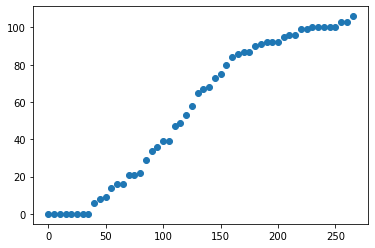

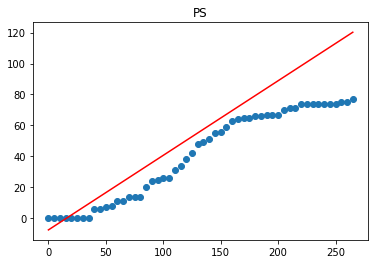

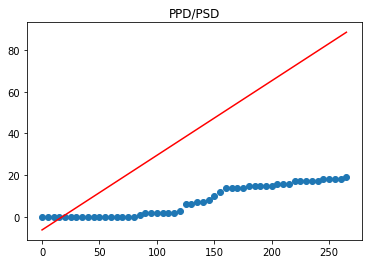

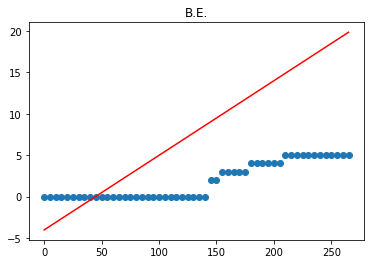

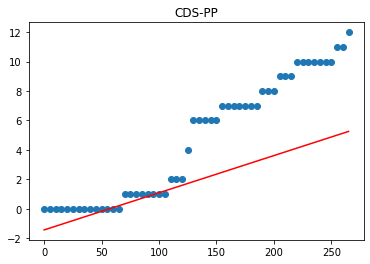

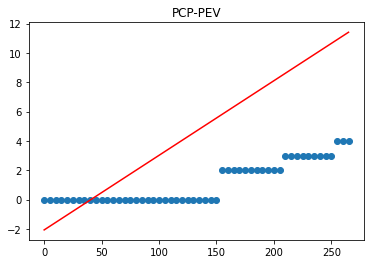

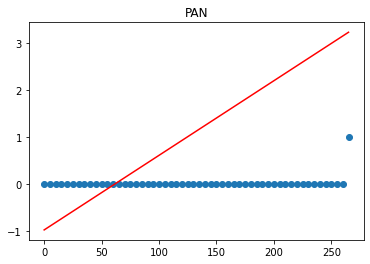

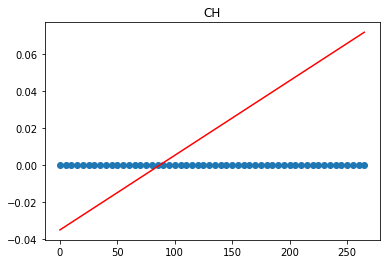

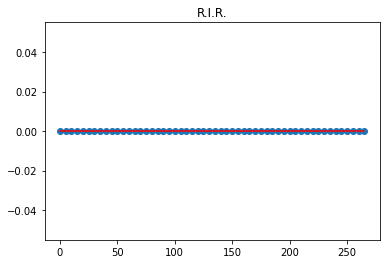

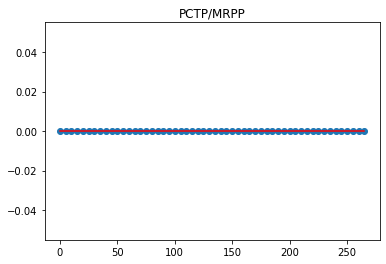

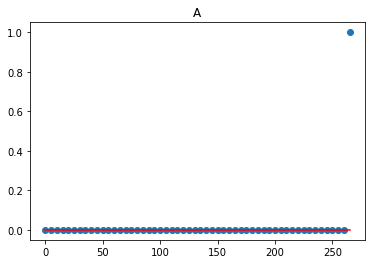

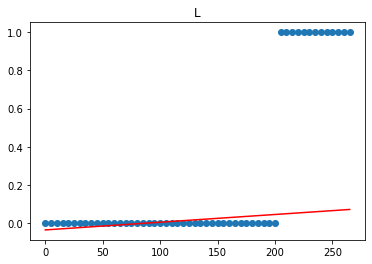

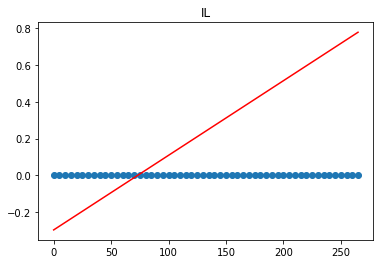

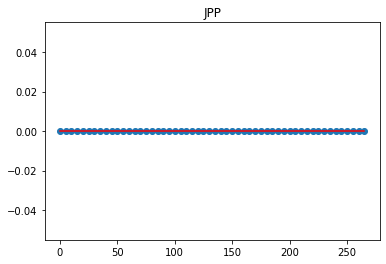

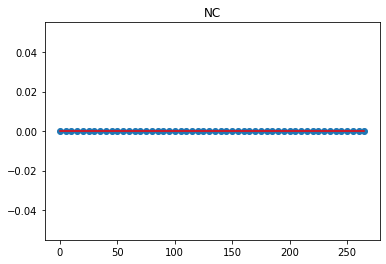

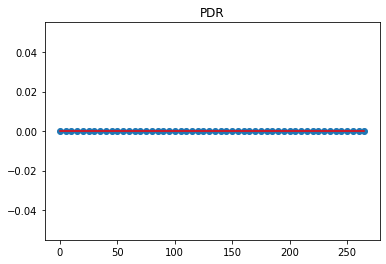

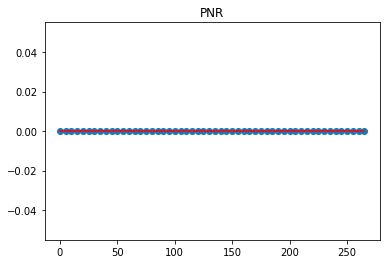

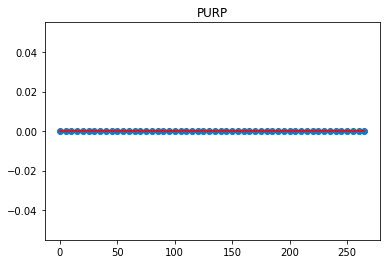

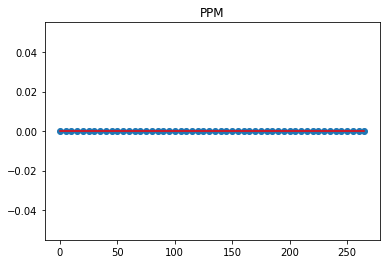

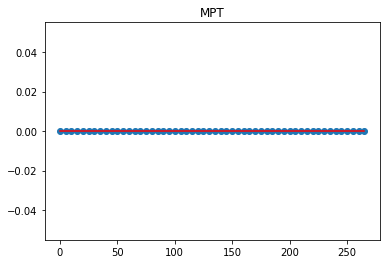

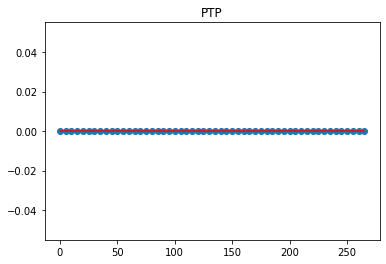

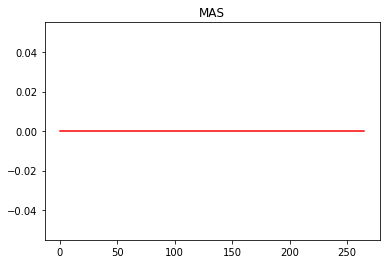

In [36]:
for partia in partie:
    Nac = dane.loc[dane['Party'] == partia]
    X = Nac['TimeElapsed'].to_numpy()
    Y = Nac['Mandates'].to_numpy()
    Xout, Yout = poli_regression(X,Y)
    plt.figure()
    plt.title(partia)
    plt.plot(Xout,Yout, color = 'red')

Predykcja

In [16]:
dane2 = dane.loc[(dane['Party'] == 'PS') | (dane['Party'] == 'PPD/PSD') | (dane['Party'] == 'B.E.')]

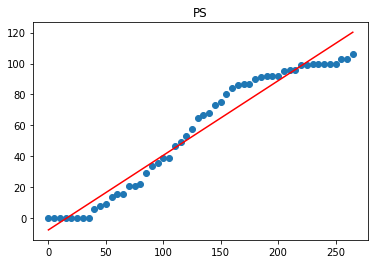

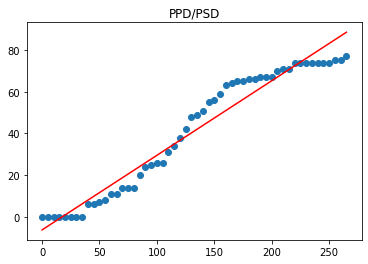

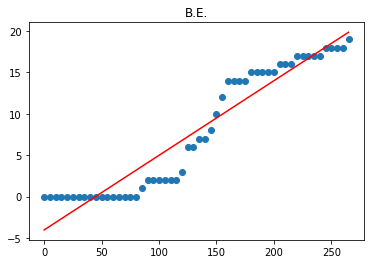

In [17]:
for partia in ['PS','PPD/PSD','B.E.']:
    Nac2 = dane2.loc[dane['Party'] == partia]
    X = Nac2['TimeElapsed'].to_numpy()
    Y = Nac2['Mandates'].to_numpy()
    plt.figure()
    plt.title(partia)
    poli_regression(X,Y)

Przewidywanie z wykorzystaniem pakietu sklearn

In [18]:
for partia in ['PS','PPD/PSD','B.E.']:
    Nac2 = dane2.loc[dane['Party'] == partia]
    X = Nac2['TimeElapsed'].to_numpy()
    Y = Nac2['Mandates'].to_numpy()
    poly_reg = PolynomialFeatures(degree=5)
    X_poly = poly_reg.fit_transform(X.reshape(-1, 1))
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, Y)
    przewidziane = []
    for i in range(X[-2],X[-1]):
        przewidziane.append(pol_reg.predict(poly_reg.fit_transform([[i]])))
    print(Y[-1],przewidziane, partia)

106 [array([103.89802643]), array([104.28315667]), array([104.6888194]), array([105.11581843]), array([105.56497063])] PS
77 [array([76.05025782]), array([76.33930415]), array([76.6461061]), array([76.97138277]), array([77.31586551])] PPD/PSD
19 [array([18.4008986]), array([18.52755186]), array([18.6625478]), array([18.80625132]), array([18.95903448])] B.E.


Wielomian 5 stopnia zapewnia dobrą predykcję wyników

Predykacja przy użyciu algorytmu wyszukiwania binarnego

In [31]:
def binary_search(item_list,mid):
    first = item_list[0]
    last  = item_list[-1] 
    szukany = last
    print(item_list[mid])
    if szukany - item_list[mid] <= 30 :
        print('znaleziona')
        return item_list[mid],mid
    else:
        if szukany < item_list[mid]:
                mid = mid - 1
                return binary_search(item_list,mid)
                
        else:
                mid = mid + 1
                return binary_search(item_list,mid)
                

In [32]:
PS = dane2.loc[dane['Party'] == 'PS']
PS = PS['Mandates'].to_numpy()
PPD = dane2.loc[dane['Party'] == 'PPD/PSD']
PPD =PPD['Mandates'].to_numpy()
BE = dane2.loc[dane['Party'] == 'B.E.']
BE = BE['Mandates'].to_numpy()

In [33]:
mid = int(len(PS)/2)
a, b = binary_search(PS,mid)

mid = int(len(PPD)/2)
c,d  = binary_search(PPD,mid)

mid = int(len(BE)/2)
d,e  = binary_search(BE,mid)


67
68
73
75
80
znaleziona
49
znaleziona
7
znaleziona


Implementacja pakietu sklearn zapewnia dokładniejsze wyniki predykcji na tym zbiorze.